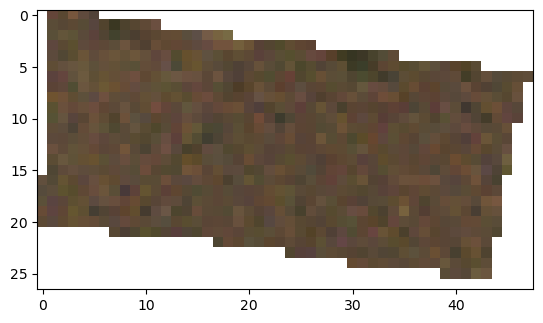

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def read_tif(file_path):
    with rasterio.open(file_path) as src:
        raster_array = src.read()
    return raster_array

# Function to visualize a sample raster
def visualize_raster(raster_array):
    plt.imshow(raster_array.transpose(1, 2, 0))
    plt.show()

# Function for basic feature extraction
def extract_features(raster_array):

    features = np.zeros((raster_array.shape[0], 4))  
    for i in range(raster_array.shape[0]):
        features[i, 0] = np.mean(raster_array[i, :, :])
        features[i, 1] = np.std(raster_array[i, :, :])
    return features

tif_file_path = "C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment/99_2022_5.tif"
raster_array = read_tif(tif_file_path)

visualize_raster(raster_array)




In [2]:

def get_number_of_bands(file_path):
    with rasterio.open(file_path) as src:
        num_bands = src.count
    return num_bands

tif_file_path = "C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment/99_2022_5.tif"
num_bands = get_number_of_bands(tif_file_path)

print("Number of Bands:", num_bands)


Number of Bands: 4


In [3]:

def get_height_width(file_path):
    with rasterio.open(file_path) as src:
        height = src.height
        width = src.width
    return height, width


tif_file_path = "C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment/99_2022_5.tif"
height, width = get_height_width(tif_file_path)

print("Height:", height)
print("Width:", width)


Height: 27
Width: 48


In [4]:

def extract_features(file_path):
    with rasterio.open(file_path) as src:
        raster_array = src.read()

    num_bands, height, width = raster_array.shape

    
    reshaped_array = raster_array.reshape(num_bands, -1)

    # Calculate features (mean, std, max) for each band
    features = []
    for band_data in reshaped_array:
        band_features = {
            'mean': np.mean(band_data),
            'std': np.std(band_data),
            'max': np.max(band_data),
        }
        features.append(band_features)

    return features

# Example usage
tif_file_path = "C:/Users/KRIDAY PARMAR/Downloads/prospace_assignment/prospace_assignment/99_2022_5.tif"
extracted_features = extract_features(tif_file_path)

# Print the extracted features
for band_idx, band_features in enumerate(extracted_features):
    print(f"Band {band_idx + 1} Features: {band_features}")


Band 1 Features: {'mean': 65.4729938271605, 'std': 42.44356324332448, 'max': 119}
Band 2 Features: {'mean': 52.37885802469136, 'std': 33.7985930553781, 'max': 106}
Band 3 Features: {'mean': 38.62191358024691, 'std': 25.059169757412217, 'max': 72}
Band 4 Features: {'mean': 181.21527777777777, 'std': 115.63268972594287, 'max': 255}


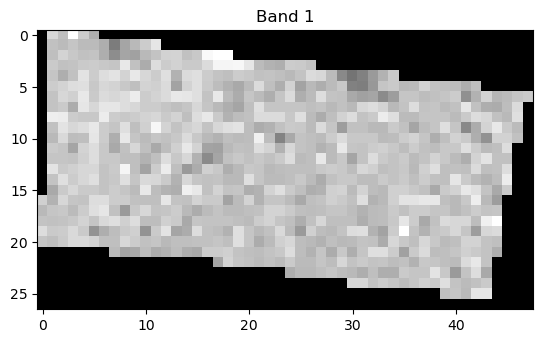

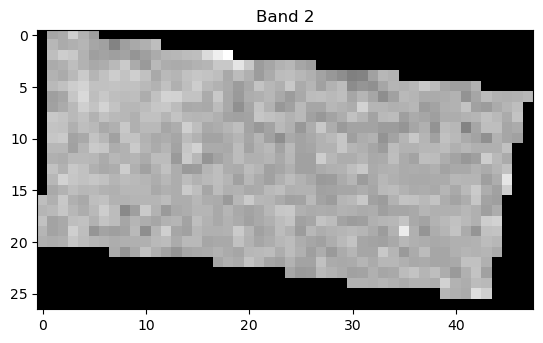

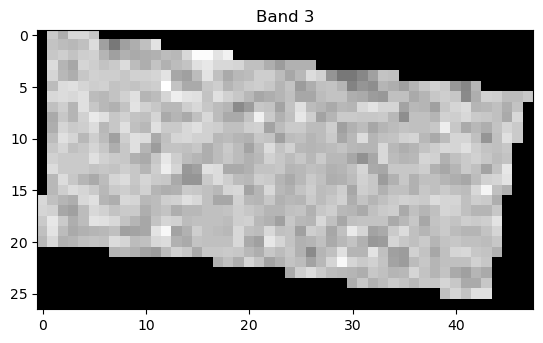

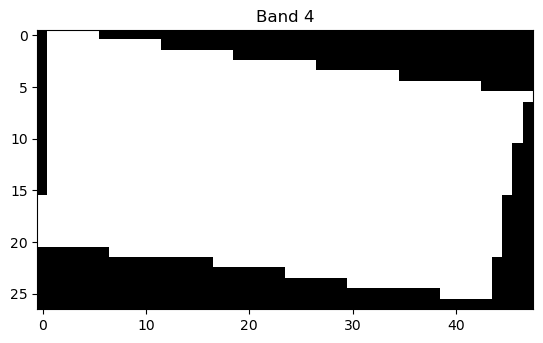

In [5]:

with rasterio.open(tif_file_path) as src:
    # Display each band
    for band_num in range(1, src.count + 1):
        band_data = src.read(band_num)
        plt.imshow(band_data, cmap='gray')  # Use a suitable colormap
        plt.title(f"Band {band_num}")
        plt.show()


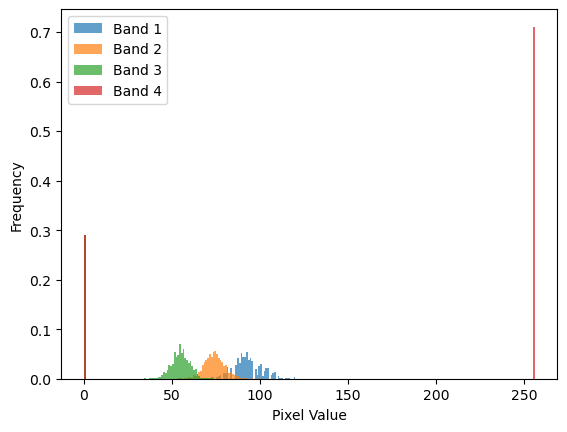

In [6]:

with rasterio.open(tif_file_path) as src:
    # Plot histogram for each band
    for band_num in range(1, src.count + 1):
        band_data = src.read(band_num)
        plt.hist(band_data.flatten(), bins=256, range=(0, 256), density=True, alpha=0.7, label=f"Band {band_num}")

    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [7]:

with rasterio.open(tif_file_path) as src:
    # Extract metadata
    metadata = src.meta

# Print the metadata
print("Image Metadata:")
print(metadata)


Image Metadata:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 48, 'height': 27, 'count': 4, 'crs': CRS.from_epsg(3857), 'transform': Affine(4.77731426716, 0.0, 8639772.85216512,
       0.0, -4.77731426716, 2396472.819727333)}


In [8]:
import rasterio

# File path to your TIF image


# Open the TIF file using rasterio
with rasterio.open(tif_file_path) as src:
    # Extract metadata
    metadata = src.meta

    # Check for band-related information in metadata
    if 'description' in metadata:
        print("Band Names or Descriptions:")
        print(metadata['description'])
    else:
        print("Band information not found in metadata.")


Band information not found in metadata.
